<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>Movie review classification with Scikit Learn.</h1>
</div>

<strong>Content:</strong>

1. Load the Data.
    + Importing Libraries.
    + Loading the data
2. Building a Vocabulary from scratch.
3. Using Scikit-learn to extract features from text data.
4. Building the Classifier.

The dataset use in this project can be found in this [link](http://www.cs.cornell.edu/people/pabo/movie-review-data/).
<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Load the Data</h2>
</div>

In this section you will:

- Import the libraries.
- Load the dataset.

### 1.1 Import Libraries

In [1]:
import re
import os

import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt

#to data split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

### 1.2 Loading the data.

In [2]:
def get_text_data(path, label = None):
    
    X = []
    for review in os.listdir(path):
        with open(os.path.join(path,review)) as f:
            rev = f.read()
            
        X.append(rev)
        
    y = [label]*len(X)
        
    return X, y

#folder path
positive_review = "review_polarity/txt_sentoken/pos"
negative_review = "review_polarity/txt_sentoken/neg"

X,y = get_text_data(positive_review, label = "pos")
X_neg, y_neg = get_text_data(negative_review, label = "neg")

X += X_neg
y += y_neg

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Building a vocabulary from scratch.</h2>
</div>


In [3]:
#getting the word frequency
vocab = {}

for word in X[0].split():
    if word in vocab.keys():
        vocab[word] += 1
    else:
        vocab[word] = 0

In [4]:
vocab.values()

dict_values([2, 4, 20, 8, 10, 1, 51, 39, 5, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 17, 0, 0, 12, 36, 0, 0, 0, 55, 5, 0, 2, 16, 0, 2, 0, 0, 7, 0, 0, 15, 2, 2, 18, 1, 17, 1, 0, 0, 0, 0, 0, 4, 2, 0, 3, 1, 0, 0, 1, 4, 0, 2, 1, 2, 2, 0, 8, 0, 0, 0, 0, 0, 9, 3, 3, 0, 5, 5, 2, 4, 0, 1, 1, 0, 5, 0, 0, 0, 0, 1, 0, 5, 0, 0, 2, 0, 0, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 0, 1, 2, 0, 0, 0, 1, 7, 0, 0, 2, 2, 11, 0, 0, 0, 0, 0, 11, 0, 1, 0, 0, 1, 1, 2, 0, 0, 2, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 1, 1, 6, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 3, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [5]:
keys, values = zip(*vocab.items())
n_cols = 6
step = len(keys)//n_cols

for k1,v1,k2,v2,k3,v3,k4,v4,k5,v5,k6,v6 in zip(keys[0:step],values[0:step],
                                               keys[step:2*step],values[step:2*step],
                                               keys[2*step:3*step],values[2*step:3*step],
                                               keys[3*step:4*step],values[3*step:4*step],
                                               keys[4*step:5*step],values[4*step:5*step],
                                               keys[5*step:6*step],values[5*step:6*step]):
    print(f"{k1:{12}}:{v1}      {k2:{14}}:{v2}      {k3:{10}}:{v3}      {k4:{10}}:{v4}      {k5:{10}}:{v5}      {k6:{10}}:{v6}")

matthew     :2      than          :2      extracurricular:0      envy      :0      envied    :0      car       :0
broderick   :4      entertain     :0      activities:0      convinces :0      because   :0      leaving   :0
and         :20      for           :8      always    :0      against   :0      takes     :1      can       :0
high        :8      103           :0      her       :11      claims    :0      trust     :0      see       :0
school      :10      minutes       :0      hand      :0      democracy :0      give      :0      pride     :0
comedy      :1      occupies      :0      up        :1      you       :5      privilege :0      eyes      :0
.           :51      ;             :0      first     :0      need      :0      uses      :0      presents  :0
the         :39      shocks        :0      class     :0      choices   :0      amoral    :0      list      :0
two         :5      as            :9      extremely :1      having    :0      advantage :0      signatures:0
terms    

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Using Scikit-learn to extract features from text data.</h2>
</div>


### 3.1 CountVectorizer class

In [6]:
corpus = [
    'This is the first document.',
    'This document is the second document',
    'And this is the third one',
    'Is this the first document?'
]

#we can use the parameter "stop_words" to filter out stop-words
vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(corpus)

#after the filtering process we obtain just two words for this example.
vectorizer.get_feature_names()

['document', 'second']

In [7]:
#The word frequency looks like
X.toarray()

array([[1, 0],
       [2, 1],
       [0, 0],
       [1, 0]], dtype=int64)

#### Using scikit-learn

In [8]:
freq_vector = CountVectorizer(stop_words = "english")

X_train_freq = freq_vector.fit_transform(X_train)
X_train_freq.shape

(1340, 33470)

<div class="alert alert-info" style="margin: 20px">We get a sparce Matrix with 1340 reviews and 33470 features</div>

### 3.2 TfidTransformer class

To get the Term-frequency times inverse document-frequency we can use a scikit-learn predefined class

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transf = TfidfTransformer()

X_train_tfidf = tfidf_transf.fit_transform(X_train_freq)
X_train_tfidf.shape

(1340, 33470)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Building the model.</h2>
</div>

Let's create a basic classifier and see how it performs. The algorithm will be the "Linear Support Vector" this algorithm is able to handle sparse features and large numbers of samples.

In [10]:
from sklearn.svm import LinearSVC

classifier = LinearSVC()
classifier.fit(X_train_tfidf,y_train)

LinearSVC()

#### Using Pipeline

scikit-learn provides a Pipeline class which serves to assemble several steps that can be cross-validated together.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_classifier = Pipeline([
    ('tfidvectorizer',TfidfVectorizer()),
    ('LinearSVC',LinearSVC())
])

text_classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidvectorizer', TfidfVectorizer()),
                ('LinearSVC', LinearSVC())])

#### Model Performance

In [12]:
predictions = text_classifier.predict(X_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

         neg       0.81      0.84      0.82       320
         pos       0.85      0.81      0.83       340

    accuracy                           0.83       660
   macro avg       0.83      0.83      0.83       660
weighted avg       0.83      0.83      0.83       660



Text(0.5, 1.0, 'Confusion matrix')

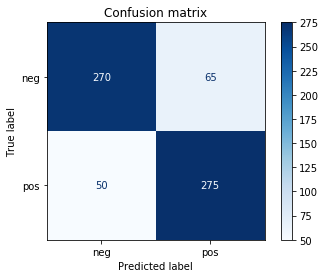

In [13]:
# Plot non-normalized confusion matrix
title = "Confusion matrix"
normalize = None

class_names = text_classifier.classes_

disp = plot_confusion_matrix(text_classifier, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize=normalize)
disp.ax_.set_title(title)

In [14]:
#general accuracy
print(accuracy_score(y_test,predictions))

0.8257575757575758
